##  ESoWC 2019 – Data-driven feature selection towards improving forecast-based prediction of wildfire hazard

**Maria João Sousa** ([github](https://github.com/mariajoaosousa), LinkedIn, Twitter)

**Eduardo Araújo** ([github](https://github.com/eduardogfma), LinkedIn, Twitter)

**Project github page:** [https://github.com/esowc/ml_fire](https://github.com/esowc/ml_fire)

# Getting started with data – Tutorial 01, FWI Dataset

This document is the first of a series of tutorials in which it will be presented the datasets to be used in the project, as well as some useful Python packages and basic preprocessing techniques.

This notebook is structured as follows. The Canadian Forest Fire Weather Index (FWI) System is first presented, followed by a brief characterization of the FWI dataset. Then, the `xarray` package is introduced. The document ends with the creation of an animated GIF showing the variation of the FWI across the globe over time.


## 1. Canadian Forest Fire Weather Index (FWI) System

The **Canadian Forest Fire Weather Index (FWI) System** is a wildfire hazard estimation system computed by Météo France and the Meteorological Service of Canada. It consists of **six components that account for the effects of fuel moisture and wind on fire behavior**, as shown in Figure 1.

The first three components, the **fuel moisture codes**, are **numeric ratings** of the moisture content of litter and other fine fuels, the average moisture content of loosely compacted organic layers of moderate depth, and the average moisture content of deep, compact organic layers.

The remaining three components are **fire behavior indices**, which represent the **rate of fire spread, the fuel available for combustion, and the frontal fire intensity**; their values rise as the fire danger increases.</div>

[![FWI Structure](https://cwfis.cfs.nrcan.gc.ca/images/fwi_structure.gif)](https://cwfis.cfs.nrcan.gc.ca/background/summary/fwi)

Figure 1 - Structure of the FWI System.

## 2. FWI dataset, xarray *Dataset* structure

The FWI dataset can be downloaded [here](https://zenodo.org/record/1406194). The following list characterizes the dataset:

* File format: netcdf4
* Coordinate system: World Geodetic System 1984 (also known as WGS 1984, EPSG:4326).
* Longitude range: [-180, +180]
* Temporal resolution: 1 day
* Spatial resolution: 0.7 degrees (~80 Km)
* Spatial coverage: Global
* Time span: from 1980-01-01 to 2018-06-30

As can be seen, the file format is `netcdf4`. To deal with this type of file, the best way is to make use of the `xarray` package ([link here](https://xarray.pydata.org)). This package provides various data srtuctures. For this particular case, one can focus on the [`xarray.Dataset`](https://xarray.pydata.org/en/stable/data-structures.html#dataset), xarray’s multi-dimensional equivalent of a `pandas` `DataFrame`. It is a dict-like container of labeled arrays (`DataArray` objects) with aligned dimensions. It is designed as an in-memory representation of the data model from the `netcdf4` file format.

In addition to the dict-like interface of the dataset itself, which can be used to access any variable in a dataset, datasets have four key properties:

* `dims`: a dictionary mapping from dimension names to the fixed length of each dimension (e.g., {`'x': 6, 'y': 6, 'time': 8`})

* `data_vars`: a dict-like container of DataArrays corresponding to variables

* `coords`: a dict-like container of DataArrays intended to label points used in `data_vars` (e.g., arrays of numbers, datetime objects or strings)
    
* `attrs`: an `OrderedDict` to hold arbitrary metadata

***Note:***

_**Coordinates:** indicate **constant/fixed/independent** quantities_

_**Data:** indicate **varying/measured/dependent** quantities._

Figure 2 presents a schematic representation of the FWI dataset.

![](dataCube.png)

Figure 2 - netCDF file format data model.

To learn more about `xarray`, the interested reader is referred to the official [documentation](https://xarray.pydata.org).

## 3. Data exploration

Data exporation starts with the import of the necessary packages. In particular, the `PIL` package is necessary to produce the GIF at the end.

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import PIL
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ds = xr.open_dataset('../rawData/fwi.nc')   # importing the FWI dataset as xarray.Dataset

In [3]:
ds

<xarray.Dataset>
Dimensions:  (lat: 256, lon: 512, time: 14061)
Coordinates:
  * lon      (lon) float32 -180.0 -179.29688 -178.59375 ... 178.59375 179.29688
  * lat      (lat) float32 89.46282 88.76695 88.06697 ... -88.76695 -89.46282
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2018-06-30
Data variables:
    fwi      (time, lat, lon) float32 ...
Attributes:
    CDI:               Climate Data Interface version 1.8.2 (http://mpimet.mp...
    history:           Fri Aug 31 16:18:06 2018: cdo cat /hugetmp/fire/geff/r...
    Conventions:       CF-1.6
    Reference date:    19800101
    ECMWF fire model:  2.2
    Lincense:          Copernicus
    version:           2.2
    NCO:               4.6.7
    CDO:               Climate Data Operators version 1.8.2 (http://mpimet.mp...

As can be see, there are 3 coordinates (longitude, latitude, and time) and 1 data variable – see Figure 2 for a graphical representation.

With the data in memory, one can inspect a particular coordinate/data variable as follows.

In [4]:
ds.lon

<xarray.DataArray 'lon' (lon: 512)>
array([-180.     , -179.29688, -178.59375, ...,  177.89062,  178.59375,
        179.29688], dtype=float32)
Coordinates:
  * lon      (lon) float32 -180.0 -179.29688 -178.59375 ... 178.59375 179.29688
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east
    axis:           X

In [5]:
ds.lat

<xarray.DataArray 'lat' (lat: 256)>
array([ 89.46282,  88.76695,  88.06697, ..., -88.06697, -88.76695, -89.46282],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 89.46282 88.76695 88.06697 ... -88.76695 -89.46282
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north
    axis:           Y

In [6]:
ds.time

<xarray.DataArray 'time' (time: 14061)>
array(['1980-01-01T00:00:00.000000000', '1980-01-02T00:00:00.000000000',
       '1980-01-03T00:00:00.000000000', ..., '2018-06-28T00:00:00.000000000',
       '2018-06-29T00:00:00.000000000', '2018-06-30T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2018-06-30
Attributes:
    standard_name:  time
    axis:           T

In [7]:
ds.fwi

<xarray.DataArray 'fwi' (time: 14061, lat: 256, lon: 512)>
[1843003392 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 -180.0 -179.29688 -178.59375 ... 178.59375 179.29688
  * lat      (lat) float32 89.46282 88.76695 88.06697 ... -88.76695 -89.46282
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2018-06-30
Attributes:
    units:    -
    title:    Fire Weather Index

## 3.1. Plotting

For a better understanding of data, it is possible to plot it. The `xarray` package allows users to make use of different plotting methods.

### Method 01

Similar to the `pandas` framework, one can plot a whole `Dataset` by making use of  the `.plot()` mthod, as follows.

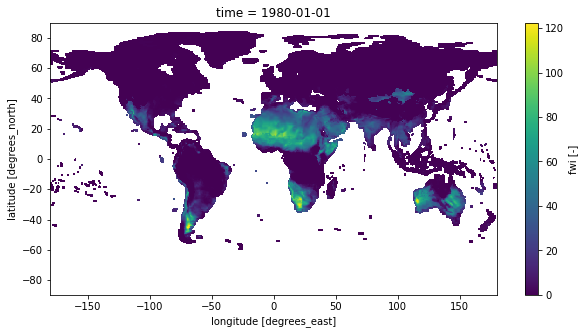

In [8]:
plt.figure(figsize=[10,5])
ds.fwi[0].plot()  # plot the 1st (oldest) data record

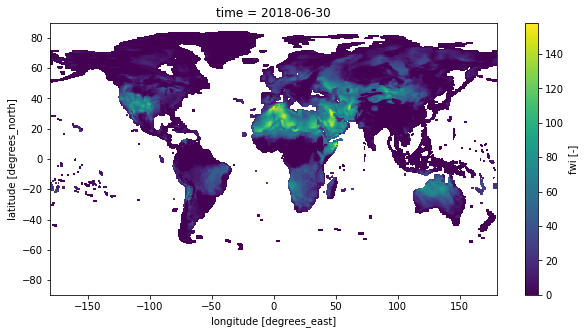

In [9]:
plt.figure(figsize=[10,5])
ds.fwi[-1].plot()  # plot the last (most recent) data record

### Method 02

For a more flexible way of plotting, one can use the `matplotlib` package, which enables the user to get higher levels of control.

Text(0.5, 1.0, '1980 - 01 - 01')

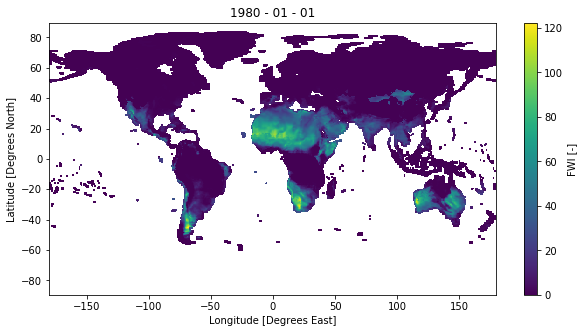

In [10]:
# Define axis
x = ds.lon
y = ds.lat

# Get date as a string
date = pd.to_datetime(str(ds.time[0].values)).strftime('%Y - %m - %d')

# Plot
fig = plt.figure(figsize=(10,5))
plt.pcolormesh(x,y,ds.fwi[0])
plt.colorbar().set_label('FWI [-]')
plt.xlabel('Longitude [Degrees East]')
plt.ylabel('Latitude [Degrees North]')
plt.title(date)

## 4. Creating a GIF – FWI over time

Creating and saving a gif file into a folder named `img` (may be necessary to previously create such a folder), showing the change in FWI over time.

In [11]:
frames = []
step = 30 * 4  # each season consists of aprox. 4 months

# Turn interactive plotting off
plt.ioff()

for i in range(0,len(ds.time),step):
    x = ds.lon
    y = ds.lat
    date = pd.to_datetime(str(ds.time[i].values)).strftime('%Y - %m - %d')

    fig = plt.figure(figsize=(16,8))
    plt.pcolormesh(x,y,ds.fwi[i])
    plt.colorbar().set_label('FWI [-]')
    plt.xlabel('Longitude [Degrees East]')
    plt.ylabel('Latitude [Degrees North]')
    plt.title(date)
    
    plt.savefig('img/test%s.png' % i)
    plt.close(fig)
    new_frame = PIL.Image.open('img/test%s.png' % i)
    frames.append(new_frame)
    
# Save into a GIF file that loops forever
dur = 250  # duration per fig
frames[0].save('fwiOverTime.gif', format='GIF', append_images=frames[1:], save_all=True, duration=dur, loop=0)

![](fwiOverTime.gif)